In [148]:
import pandas as pd
EMBEDDINGS_DF_PATH = "Pickled_Data/Embeddings/"
FILE_PATTERN = "v1Embeddings_df.pkl"
embeddings_dict = {}
for embedding_df in os.listdir(EMBEDDINGS_DF_PATH):
    # if not FILE_PATTERN in embedding_df:
    #     continue
    embeddings_dict[embedding_df.split(".")[0]] = pd.read_pickle(EMBEDDINGS_DF_PATH + embedding_df)



In [149]:
import re
NAME_CAPTURE_PATTERN = "pictures_embeddings_(.+)_df|(.+)Embeddings_df"
for re_test in embeddings_dict.keys():
    print(next(group for group in re.search(NAME_CAPTURE_PATTERN, re_test).groups() if group is not None))

resnet101
resnet34
resnet50_v1
resnet34_v1
resnet18
resnet152
resnet50
resnet101_v1
resnet18_v1
resnet152_v1


In [150]:
import re
NAME_CAPTURE_PATTERN = "pictures_embeddings_(.+)_df|(.+)Embeddings_df"

dict_items = iter(embeddings_dict.items())
first_key, first_df = next(dict_items)
model_embeddings_df = first_df.copy()
if "file_exists" in model_embeddings_df.columns:
    model_embeddings_df.drop("file_exists", axis=1, inplace=True)
model_embeddings_df.rename({"embeddings":next(group for group in re.search(NAME_CAPTURE_PATTERN, first_key).groups() if group is not None)}, axis=1, inplace=True)
for key, item_df in dict_items:
    item_df = pd.DataFrame(item_df[["id", "embeddings"]])
    item_df.rename({"embeddings": next(group for group in re.search(NAME_CAPTURE_PATTERN, key).groups() if group is not None)}, axis=1, inplace=True)
    model_embeddings_df = pd.merge(model_embeddings_df, item_df, on="id", how="inner")
    

In [151]:
import torch
import numpy as np
def distance_evaluator(embedding_1, embedding_2):
    return torch.dist(embedding_1, embedding_2, 2).item()

DISTANCE_EVALUATION_COLUMNS = ["resnet18", "resnet18_v1", "resnet34", "resnet34_v1", "resnet50", "resnet50_v1", "resnet101", "resnet101_v1", "resnet152", "resnet152_v1",]
TARGET_INDEX = 0
target_outfit = model_embeddings_df.iloc[TARGET_INDEX]
for evaluation_column in DISTANCE_EVALUATION_COLUMNS:
    target_embeddings = target_outfit[evaluation_column]
    model_embeddings_df[evaluation_column + "_distance0"] = model_embeddings_df[evaluation_column].apply(lambda x: distance_evaluator(target_embeddings, x))
    model_embeddings_df[evaluation_column + "_distance0"] = model_embeddings_df[evaluation_column + "_distance0"].apply(lambda x: np.round(x, 4))

model_embeddings_df

,id,owner,resnet101,resnet34,resnet50_v1,resnet34_v1,resnet18,resnet152,resnet50,resnet101_v1,...,resnet18_distance0,resnet18_v1_distance0,resnet34_distance0,resnet34_v1_distance0,resnet50_distance0,resnet50_v1_distance0,resnet101_distance0,resnet101_v1_distance0,resnet152_distance0,resnet152_v1_distance0
0,picture.00058abb53434872ae9bb4270ae21f8e,outfit.98f32aaf08bc4ff09c44e6e11e9199bc,"[tensor(0.0395), tensor(0.), tensor(0.), tenso...","[tensor(3.6604), tensor(0.8882), tensor(0.), t...","[tensor(0.2090), tensor(0.2122), tensor(2.7602...","[tensor(3.6604), tensor(0.8882), tensor(0.), t...","[tensor(0.0422), tensor(0.6410), tensor(0.0234...","[tensor(0.), tensor(0.), tensor(0.0036), tenso...","[tensor(0.3866), tensor(0.), tensor(0.), tenso...","[tensor(0.1362), tensor(0.1141), tensor(1.3258...",...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,picture.000cf715019a4a02aaf0dc479212195a,outfit.f11bdc25d87946f8b831b608bc8fb574,"[tensor(0.0059), tensor(0.0008), tensor(0.1798...","[tensor(0.9865), tensor(0.0419), tensor(0.2860...","[tensor(0.4660), tensor(0.6052), tensor(0.5312...","[tensor(0.9865), tensor(0.0419), tensor(0.2860...","[tensor(1.0837), tensor(1.1069), tensor(0.2382...","[tensor(0.), tensor(0.1230), tensor(0.0488), t...","[tensor(0.), tensor(0.), tensor(0.0786), tenso...","[tensor(1.4097), tensor(1.2075), tensor(0.8080...",...,21.2380,21.2380,19.4064,19.4064,10.8895,21.1716,14.3602,22.6219,12.7263,18.9292
2,picture.0010c2e161154d6893734981d5455e76,outfit.9387d05b47f906c5,"[tensor(0.1106), tensor(0.), tensor(0.0624), t...","[tensor(2.1947), tensor(0.2122), tensor(0.1786...","[tensor(0.1378), tensor(0.5615), tensor(1.3191...","[tensor(2.1947), tensor(0.2122), tensor(0.1786...","[tensor(0.9525), tensor(1.0100), tensor(0.2059...","[tensor(0.0043), tensor(0.), tensor(0.0463), t...","[tensor(0.3984), tensor(0.0246), tensor(0.), t...","[tensor(1.1797), tensor(0.5165), tensor(0.6992...",...,20.3935,20.3935,20.8190,20.8190,11.1317,19.4537,13.7748,23.6308,13.8774,19.0561
3,picture.00135ce8b1a04c5daa60cf7bdd99bcd5,outfit.12ae28ab0dc5494c98a1de2f8ce04b79,"[tensor(0.), tensor(0.0323), tensor(0.0826), t...","[tensor(1.7625), tensor(0.0312), tensor(0.1953...","[tensor(0.1336), tensor(0.9078), tensor(1.2725...","[tensor(1.7625), tensor(0.0312), tensor(0.1953...","[tensor(0.4718), tensor(0.2764), tensor(0.1887...","[tensor(0.), tensor(0.0676), tensor(0.), tenso...","[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[tensor(1.0578), tensor(0.2871), tensor(1.0123...",...,19.9151,19.9151,18.4457,18.4457,9.2498,18.4093,14.1804,20.9206,10.9659,17.4614
4,picture.001a58ea68da426384567b8cccc0c8a6,outfit.e989b8cb4a814d97b642e1cb326f47e6,"[tensor(0.1244), tensor(0.0008), tensor(0.), t...","[tensor(0.4765), tensor(0.0578), tensor(0.0033...","[tensor(0.1752), tensor(1.3285), tensor(1.2511...","[tensor(0.4765), tensor(0.0578), tensor(0.0033...","[tensor(0.5508), tensor(1.6819), tensor(0.2777...","[tensor(0.0061), tensor(0.0009), tensor(0.0177...","[tensor(0.), tensor(0.0055), tensor(0.0007), t...","[tensor(0.2031), tensor(0.4315), tensor(0.1934...",...,19.7398,19.7398,25.5959,25.5959,13.6510,20.3203,17.1614,25.4726,17.7984,23.5611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18055,picture.ffe927a5dc06491fb73958a896ac2b19,outfit.0263a299144e4c89b68dd66990e43d65,"[tensor(0.), tensor(0.0156), tensor(0.), tenso...","[tensor(1.1755), tensor(0.1958), tensor(0.6330...","[tensor(0.7872), tensor(0.2950), tensor(0.6264...","[tensor(1.1755), tensor(0.1958), tensor(0.6330...","[tensor(0.7562), tensor(0.0187), tensor(0.0002...","[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[tensor(0.1188), tensor(0.), tensor(0.0126), t...","[tensor(0.2916), tensor(0.9840), tensor(0.9360...",...,22.7251,22.7251,24.1087,24.1087,11.8996,24.1760,16.3053,26.0021,16.0580,28.1673
18056,picture.fff4edd997914149927603fb0a9a3009,outfit.4779ad6771a746408fb5d492ae345d18,"[tensor(0.0048), tensor(0.), tensor(0.0004

In [152]:
model_embeddings_df.describe()

,resnet18_distance0,resnet18_v1_distance0,resnet34_distance0,resnet34_v1_distance0,resnet50_distance0,resnet50_v1_distance0,resnet101_distance0,resnet101_v1_distance0,resnet152_distance0,resnet152_v1_distance0
count,18060.000000,18060.000000,18060.000000,18060.000000,18060.000000,18060.000000,18060.000000,18060.000000,18060.000000,18060.000000
mean,21.164118,21.164118,22.597611,22.597611,12.113185,21.169561,14.690498,24.852111,14.316606,21.447543
std,3.276275,3.276275,3.164367,3.164367,1.844798,2.856488,2.380595,3.048366,2.421478,3.238923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.894650,18.894650,20.389525,20.389525,10.838100,19.178700,13.199700,22.761800,12.725450,19.163900
50%,20.838650,20.838650,22.282700,22.282700,11.877600,20.904300,14.322500,24.520600,13.977100,21.247450
75%,23.138200,23.138200,24.531600,24.531600,13.152750,23.020150,15.748200,26.602425,15.477400,23.573450
max,41.115200,41.115200,36.713300,36.713300,21.576700,39.866800,34.657900,39.503300,32.121200,35.607900


In [153]:
#PICKLED_DATA_FOLDER = "../FREja_dataset_processing/"
PICKLED_DATA_FOLDER = "Pickled_Data/"
PICKLED_OUTFITS_FILE = "active_outfits_df.pkl"
OUTFITS_DROP_COLUMNS = ['owner', 'name', 'brand', 'isPublic', 'isDeleted', 'meta.validFrom', 'meta.validTo', "Outfit_size"]

outfits_df = pd.read_pickle(PICKLED_DATA_FOLDER + PICKLED_OUTFITS_FILE)
outfits_df.drop(OUTFITS_DROP_COLUMNS, axis=1, inplace=True)
IGNORE_CATEGORIES = ["Size", "Brand", "brand", "Fit"]
outfits_df["filtered_tags"] = outfits_df.apply(lambda row: [tag for tag, cat in zip(row["outfit_tags"], row["tag_categories"]) if cat not in IGNORE_CATEGORIES], axis=1)
outfits_df["filtered_tag_categories"] = outfits_df.apply(lambda row: [cat for cat in row["tag_categories"] if cat not in IGNORE_CATEGORIES], axis=1)
outfits_df["filtered_tags"].explode().value_counts()

Everyday     5162
Spring       2825
Fall         2236
Summer       2174
Long arms    2091
             ... 
Studs           6
Feathers        5
One             1
Tulle           1
Lycra           1
Name: filtered_tags, Length: 132, dtype: int64

In [154]:

TAG_WEIGHT_DF_PATH = f"Pickled_Data/tag_entropy_df.pkl"
TO_DROP_COLUMNS = ["Shoe Size", "brand"]
tag_weights_df = pd.read_pickle(TAG_WEIGHT_DF_PATH)
tag_weights_df.loc["default_weight"] = 1
tag_weights_df.loc["inverse_normalized"] = 1 - tag_weights_df.loc["normalized"]
tag_weights_df.drop(TO_DROP_COLUMNS, axis=1, inplace=True)
tag_weights_df

,Brand,Material,Category,Color,Size,No category,Occassion,Sleeve,Embellishment,Neckline,Waist,Pattern,Fit,Length,Occasion
entropy,2.150160,2.052015,1.293279,1.930027,1.175349,1.933907,1.735647,1.204265,0.602437,1.310849,1.152163,0.902646,1.094322,1.033667,0.140358
normalized,0.348272,0.549009,0.412464,0.655482,0.458235,0.778261,0.753782,0.579129,0.289711,0.630385,0.592095,0.463868,0.679941,0.642253,0.127759
lower,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
upper,6.173786,3.737670,3.135494,2.944439,2.564949,2.484907,2.302585,2.079442,2.079442,2.079442,1.945910,1.945910,1.609438,1.609438,1.098612
default_weight,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
inverse_normalized,0.651728,0.450991,0.587536,0.344518,0.541765,0.221739,0.246218,0.420871,0.710289,0.369615,0.407905,0.536132,0.320059,0.357747,0.872241


In [155]:
tags_list = outfits_df["filtered_tags"].explode().unique()
tags_list

array(['Wool', 'Winter', 'Everyday', 'Fall', 'Cardigans', 'Black',
       'Long arms', 'Spring', 'Round Neck', 'FJONG Bump', 'Collar',
       'Business', 'FJONG Active', 'Outerwear', 'Normal', 'Polyester',
       'Coats', 'Down', 'Green', 'Cotton', 'V-neck', 'Cashmere', 'Shirts',
       'Blouses', 'Pink', 'Pattern', 'Tops', 'High', 'Skirts',
       'Adjustable', 'Mini', 'Party', 'Brown', 'Classic', 'Going out',
       'Dresses', 'Viscose', 'T-shirt', 'Floral', 'Summer', 'Romantic',
       'Blue', 'Purple', 'Orange', 'Multicolor', 'Dressed-up', 'Midi',
       'White', 'Nylon', 'Leather', 'Bags', 'Maxi', 'Grey', 'Ruffles',
       'Denim', 'Elastane', 'Pants', 'Blazers', 'Silk', 'New', 'Animal',
       'Mid arms', 'Knitwear', 'Sweaters', 'Stripes', 'Edgy', 'Yellow',
       'Polyurethane', 'Red', 'Glitter', 'Kimonos', 'Turtleneck',
       'Jackets', 'Faux fur', 'Spaghetti straps', 'Sequins', 'Acetate',
       'Spandex', 'Jumpsuits', 'Accessories', 'Beige', 'Lace',
       'Vegan Leather', '

In [156]:
# to_dict_df = tag_weights_df.copy()
# to_dict_df.set_index("category", inplace=True)
# mean_weights_dict = to_dict_df["mean_weight"].to_dict()
# default_weights_dict = to_dict_df["default_weight"].to_dict()

entropy_weights_dict = tag_weights_df.to_dict(orient="index")["entropy"]
inverse_normalized_dict = tag_weights_df.to_dict(orient="index")["inverse_normalized"]
normalized_dict = tag_weights_df.to_dict(orient="index")["normalized"]
default_weights_dict = tag_weights_df.to_dict(orient="index")["default_weight"]
entropy_weights_dict

{'Brand': 2.150159717749954,
 'Material': 2.0520146897999667,
 'Category': 1.2932792470075136,
 'Color': 1.9300273942886543,
 'Size': 1.1753488262566292,
 'No category': 1.933907103186362,
 'Occassion': 1.7356473279322322,
 'Sleeve': 1.2042652398857783,
 'Embellishment': 0.6024372126771929,
 'Neckline': 1.310848834157878,
 'Waist': 1.1521627138890005,
 'Pattern': 0.9026457547791364,
 'Fit': 1.094322358615259,
 'Length': 1.0336670978736835,
 'Occasion': 0.14035797783092815}

In [157]:
torch.randint(0, 2, (len(outfits_df),len(tags_list))).shape

torch.Size([6150, 133])

In [158]:
len(outfits_df)

6150

In [159]:
from sklearn import preprocessing
def convert_to_vector(tags, tag_cats, tag_list, weights_dict):
    tag_vector = np.zeros(len(tag_list))
    for tag, cat in zip(tags, tag_cats):
        tag_index = np.where(tag_list == tag)[0][0]
        tag_vector[tag_index] = round(weights_dict[cat] * 1, 2)    
    return torch.Tensor(tag_vector.reshape(1, -1))

outfits_df["tag_vector"] = outfits_df.apply(lambda row: convert_to_vector(row["filtered_tags"], row["filtered_tag_categories"], tags_list, inverse_normalized_dict), axis=1)
outfits_df["tag_vector_binary"] = outfits_df.apply(lambda row: convert_to_vector(row["filtered_tags"], row["filtered_tag_categories"], tags_list, default_weights_dict), axis=1)
outfits_df["tag_vector_random"] = [torch.randint(0,2, size=(1, len(tags_list))) for _ in range(len(outfits_df))]
outfits_df["tag_vector_shuffled"] = np.random.permutation(outfits_df["tag_vector"].values)
outfits_df

,id,outfit_tags,tag_categories,tag_encoding,filtered_tags,filtered_tag_categories,tag_vector,tag_vector_binary,tag_vector_random,tag_vector_shuffled
0,outfit.00004b4d01ca4ab0a70cf073ba74fefa,"[Wool, Winter, Everyday, Fall, Medium, Cardiga...","[Material, No category, Occassion, No category...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[Wool, Winter, Everyday, Fall, Cardigans, Blac...","[Material, No category, Occassion, No category...","[[tensor(0.4500), tensor(0.), tensor(0.), tens...","[[tensor(1.), tensor(0.), tensor(0.), tensor(0...","[[tensor(1), tensor(0), tensor(0), tensor(0), ...","[[tensor(0.), tensor(0.), tensor(0.), tensor(0..."
1,outfit.00234201fa2d4ee49a572d650c775213,"[FJONG Active, Winter, Outerwear, Everyday, No...","[Occassion, No category, Category, Occassion, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[FJONG Active, Winter, Outerwear, Everyday, No...","[Occassion, No category, Category, Occassion, ...","[[tensor(0.), tensor(0.), tensor(0.), tensor(0...","[[tensor(0.), tensor(0.), tensor(0.), tensor(0...","[[tensor(0), tensor(1), tensor(1), tensor(1), ...","[[tensor(0.), tensor(0.), tensor(0.), tensor(0..."
2,outfit.003356af26964c5084d0cc1e9f95978c,"[Winter, Cotton, Everyday, Fall, Skappel, V-ne...","[No category, Material, Occassion, No category...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[Winter, Cotton, Everyday, Fall, V-neck, Cashm...","[No category, Material, Occassion, No category...","[[tensor(0.), tensor(0.2200), tensor(0.), tens...","[[tensor(0.), tensor(1.), tensor(0.), tensor(0...","[[tensor(1), tensor(1), tensor(0), tensor(0), ...","[[tensor(0.), tensor(0.), tensor(0.2500), tens..."
3,outfit.003e042f5e9e4043bf10a0284d88ce75,"[Everyday, Normal, Blouses, Long arms, Spring,...","[Occassion, Waist, Category, Sleeve, No catego...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[Everyday, Normal, Blouses, Long arms, Spring,...","[Occassion, Waist, Category, Sleeve, No catego...","[[tensor(0.), tensor(0.), tensor(0.2500), tens...","[[tensor(0.), tensor(0.), tensor(1.), tensor(0...","[[tensor(1), tensor(0), tensor(0), tensor(0), ...","[[tensor(0.), tensor(0.), tensor(0.), tensor(0..."
4,outfit.005123277cc440ffbac2d52252cfcac1,"[High, Wrap, Skirts, Adjustable, Polyester, Mi...","[Waist, Fit, Category, Waist, Material, Length...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[High, Skirts, Adjustable, Polyester, Mini, Pa...","[Waist, Category, Waist, Material, Length, Occ...","[[tensor(0.), tensor(0.), tensor(0.), tensor(0...","[[tensor(0.), tensor(0.), tensor(0.), tensor(0...","[[tensor(0), tensor(1), tensor(1), tensor(0), ...","[[tensor(0.), tensor(0.), tensor(0.), tensor(0..."
...,...,...,...,...,...,...,...,...,...,...
6145,outfit.ffa8069f351a4561abd6000d658e7bfb,"[Wool, Winter, Nylon, Cotton, Knitwear, Everyd...","[Material, No category, Material, Material, Ca...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[Wool, Winter, Nylon, Cotton, Knitwear, Everyd...","[Material, No category, Material, Material, Ca...","[[tensor(0.4500), tensor(0.), tensor(0.), tens...","[[tensor(1.), tensor(0.), tensor(0.), tensor(0...","[[tensor(1), tensor(1), tensor(1), tensor(0), ...","[[tensor(0.), tensor(0.), tensor(0.), tensor(0..."
6146,outfit.ffb003f0cb704409b5db080bdd2482d4,"[Nylon, Dressed-up, Cotton, Yaya, Elastane, Ev...","[Material, No category, Material, Brand, Mater...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[Nylon, Dressed-up, Cotton, Elastane, Everyday...","[Material, No category, Material, Material, Oc...","[[tensor(0.), tensor(0.), tensor(0.), tensor(0...","[[tensor(0.), tensor(0.), tensor(0.), tensor(0...","[[tensor(1), tensor(0), tensor(1), tensor(1), ...","[[tensor(0.), tensor(0.), tensor(0.), tensor(0..."
6147,outfit.ffe4d235a016429dae41bb6399cf16d1,"[Accessories, Onesize, Everyday, Kaibosh, Grey...","[Category, Size, Occassion, Brand, Color, Mate...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...","[Accessories, Everyday, Grey,

In [160]:
test_outfits_df = outfits_df.copy()
test_outfits_df["tag_vector_shuffled"] = np.random.permutation(test_outfits_df["tag_vector"].values)
test_outfits_df

,id,outfit_tags,tag_categories,tag_encoding,filtered_tags,filtered_tag_categories,tag_vector,tag_vector_binary,tag_vector_random,tag_vector_shuffled
0,outfit.00004b4d01ca4ab0a70cf073ba74fefa,"[Wool, Winter, Everyday, Fall, Medium, Cardiga...","[Material, No category, Occassion, No category...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[Wool, Winter, Everyday, Fall, Cardigans, Blac...","[Material, No category, Occassion, No category...","[[tensor(0.4500), tensor(0.), tensor(0.), tens...","[[tensor(1.), tensor(0.), tensor(0.), tensor(0...","[[tensor(1), tensor(0), tensor(0), tensor(0), ...","[[tensor(0.), tensor(0.), tensor(0.), tensor(0..."
1,outfit.00234201fa2d4ee49a572d650c775213,"[FJONG Active, Winter, Outerwear, Everyday, No...","[Occassion, No category, Category, Occassion, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[FJONG Active, Winter, Outerwear, Everyday, No...","[Occassion, No category, Category, Occassion, ...","[[tensor(0.), tensor(0.), tensor(0.), tensor(0...","[[tensor(0.), tensor(0.), tensor(0.), tensor(0...","[[tensor(0), tensor(1), tensor(1), tensor(1), ...","[[tensor(0.), tensor(0.), tensor(0.2500), tens..."
2,outfit.003356af26964c5084d0cc1e9f95978c,"[Winter, Cotton, Everyday, Fall, Skappel, V-ne...","[No category, Material, Occassion, No category...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[Winter, Cotton, Everyday, Fall, V-neck, Cashm...","[No category, Material, Occassion, No category...","[[tensor(0.), tensor(0.2200), tensor(0.), tens...","[[tensor(0.), tensor(1.), tensor(0.), tensor(0...","[[tensor(1), tensor(1), tensor(0), tensor(0), ...","[[tensor(0.), tensor(0.2200), tensor(0.), tens..."
3,outfit.003e042f5e9e4043bf10a0284d88ce75,"[Everyday, Normal, Blouses, Long arms, Spring,...","[Occassion, Waist, Category, Sleeve, No catego...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[Everyday, Normal, Blouses, Long arms, Spring,...","[Occassion, Waist, Category, Sleeve, No catego...","[[tensor(0.), tensor(0.), tensor(0.2500), tens...","[[tensor(0.), tensor(0.), tensor(1.), tensor(0...","[[tensor(1), tensor(0), tensor(0), tensor(0), ...","[[tensor(0.), tensor(0.), tensor(0.), tensor(0..."
4,outfit.005123277cc440ffbac2d52252cfcac1,"[High, Wrap, Skirts, Adjustable, Polyester, Mi...","[Waist, Fit, Category, Waist, Material, Length...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[High, Skirts, Adjustable, Polyester, Mini, Pa...","[Waist, Category, Waist, Material, Length, Occ...","[[tensor(0.), tensor(0.), tensor(0.), tensor(0...","[[tensor(0.), tensor(0.), tensor(0.), tensor(0...","[[tensor(0), tensor(1), tensor(1), tensor(0), ...","[[tensor(0.4500), tensor(0.), tensor(0.), tens..."
...,...,...,...,...,...,...,...,...,...,...
6145,outfit.ffa8069f351a4561abd6000d658e7bfb,"[Wool, Winter, Nylon, Cotton, Knitwear, Everyd...","[Material, No category, Material, Material, Ca...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[Wool, Winter, Nylon, Cotton, Knitwear, Everyd...","[Material, No category, Material, Material, Ca...","[[tensor(0.4500), tensor(0.), tensor(0.), tens...","[[tensor(1.), tensor(0.), tensor(0.), tensor(0...","[[tensor(1), tensor(1), tensor(1), tensor(0), ...","[[tensor(0.), tensor(0.), tensor(0.), tensor(0..."
6146,outfit.ffb003f0cb704409b5db080bdd2482d4,"[Nylon, Dressed-up, Cotton, Yaya, Elastane, Ev...","[Material, No category, Material, Brand, Mater...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[Nylon, Dressed-up, Cotton, Elastane, Everyday...","[Material, No category, Material, Material, Oc...","[[tensor(0.), tensor(0.), tensor(0.), tensor(0...","[[tensor(0.), tensor(0.), tensor(0.), tensor(0...","[[tensor(1), tensor(0), tensor(1), tensor(1), ...","[[tensor(0.), tensor(0.), tensor(0.), tensor(0..."
6147,outfit.ffe4d235a016429dae41bb6399cf16d1,"[Accessories, Onesize, Everyday, Kaibosh, Grey...","[Category, Size, Occassion, Brand, Color, Mate...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...","[Accessories, Everyday, Grey,

In [161]:
outfit_merge = pd.DataFrame(outfits_df[["id", "tag_vector", "tag_vector_binary", "tag_vector_random", "tag_vector_shuffled"]])
outfit_merge.rename({"id":"owner"}, axis=1, inplace=True)
encodings_df = pd.merge(model_embeddings_df, outfit_merge, on="owner", how="inner")
encodings_df

,id,owner,resnet101,resnet34,resnet50_v1,resnet34_v1,resnet18,resnet152,resnet50,resnet101_v1,...,resnet50_distance0,resnet50_v1_distance0,resnet101_distance0,resnet101_v1_distance0,resnet152_distance0,resnet152_v1_distance0,tag_vector,tag_vector_binary,tag_vector_random,tag_vector_shuffled
0,picture.0010c2e161154d6893734981d5455e76,outfit.9387d05b47f906c5,"[tensor(0.1106), tensor(0.), tensor(0.0624), t...","[tensor(2.1947), tensor(0.2122), tensor(0.1786...","[tensor(0.1378), tensor(0.5615), tensor(1.3191...","[tensor(2.1947), tensor(0.2122), tensor(0.1786...","[tensor(0.9525), tensor(1.0100), tensor(0.2059...","[tensor(0.0043), tensor(0.), tensor(0.0463), t...","[tensor(0.3984), tensor(0.0246), tensor(0.), t...","[tensor(1.1797), tensor(0.5165), tensor(0.6992...",...,11.1317,19.4537,13.7748,23.6308,13.8774,19.0561,"[[tensor(0.), tensor(0.), tensor(0.), tensor(0...","[[tensor(0.), tensor(0.), tensor(0.), tensor(0...","[[tensor(0), tensor(1), tensor(1), tensor(1), ...","[[tensor(0.), tensor(0.), tensor(0.), tensor(0..."
1,picture.175e60f70f394a8ab74cad72b3fdb647,outfit.9387d05b47f906c5,"[tensor(0.), tensor(0.), tensor(0.1047), tenso...","[tensor(2.3458), tensor(0.0024), tensor(0.1241...","[tensor(0.0958), tensor(0.6354), tensor(1.3650...","[tensor(2.3458), tensor(0.0024), tensor(0.1241...","[tensor(0.6987), tensor(0.6193), tensor(1.1099...","[tensor(0.0057), tensor(0.), tensor(0.0149), t...","[tensor(0.6289), tensor(0.0311), tensor(0.0259...","[tensor(0.9438), tensor(0.6370), tensor(0.5911...",...,12.0925,21.6531,13.6953,23.0888,14.2006,21.2273,"[[tensor(0.), tensor(0.), tensor(0.), tensor(0...","[[tensor(0.), tensor(0.), tensor(0.), tensor(0...","[[tensor(0), tensor(1), tensor(1), tensor(1), ...","[[tensor(0.), tensor(0.), tensor(0.), tensor(0..."
2,picture.3744d321a35c4eb3a358d9d4b40ca734,outfit.9387d05b47f906c5,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[tensor(0.7599), tensor(0.0929), tensor(0.9511...","[tensor(0.1996), tensor(0.8373), tensor(0.3922...","[tensor(0.7599), tensor(0.0929), tensor(0.9511...","[tensor(0.2037), tensor(0.1351), tensor(0.0080...","[tensor(0.), tensor(0.), tensor(0.0602), tenso...","[tensor(0.), tensor(0.), tensor(0.0034), tenso...","[tensor(0.8608), tensor(0.9449), tensor(0.1847...",...,14.8359,23.8412,15.9546,26.8833,15.2337,22.5261,"[[tensor(0.), tensor(0.), tensor(0.), tensor(0...","[[tensor(0.), tensor(0.), tensor(0.), tensor(0...","[[tensor(0), tensor(1), tensor(1), tensor(1), ...","[[tensor(0.), tensor(0.), tensor(0.), tensor(0..."
3,picture.3fdd1186cdf3472499d7620ac77eb493,outfit.9387d05b47f906c5,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[tensor(0.9390), tensor(0.1349), tensor(0.4840...","[tensor(0.0456), tensor(0.3850), tensor(1.7562...","[tensor(0.9390), tensor(0.1349), tensor(0.4840...","[tensor(0.7511), tensor(1.3905), tensor(0.7110...","[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[tensor(0.0785), tensor(0.), tensor(0.0245), t...","[tensor(0.7590), tensor(0.5037), tensor(0.3928...",...,11.9310,20.9258,15.0986,25.6434,13.9330,19.9825,"[[tensor(0.), tensor(0.), tensor(0.), tensor(0...","[[tensor(0.), tensor(0.), tensor(0.), tensor(0...","[[tensor(0), tensor(1), tensor(1), tensor(1), ...","[[tensor(0.), tensor(0.), tensor(0.), tensor(0..."
4,picture.9bf82feea8694399ad98b46f48330799,outfit.9387d05b47f906c5,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[tensor(0.6385), tensor(0.0633), tensor(0.2365...","[tensor(0.1259), tensor(1.0402), tensor(0.4364...","[tensor(0.6385), tensor(0.0633), tensor(0.2365...","[tensor(0.4128), tensor(0.5036), tensor(0.4385...","[tensor(0.), tensor(0.), tensor(0.0984), tenso...","[tensor(0.), tensor(0.0239), tensor(0.), tenso...","[tensor(1.1541), tensor(0.3224), tensor(0.0458...",...,13.2642,22.7206,17.0310,26.6573,16.3612,22.3373,"[[tensor(0.), tensor(0.), tensor(0.), tensor(0...","[[tensor(0.), tensor(0.), tensor(0.), tensor(0...","[[tensor(0), tensor(1), tensor(1), tensor(1), ...","[[tensor(0.), tensor(0.), tensor(0.), tensor

In [178]:
test_outfits_df["tag_vector_binary"].isnull().sum()

1

In [162]:
# Generate random tensor embeddings for each outfit.
for column in DISTANCE_EVALUATION_COLUMNS:
    encodings_sample_tensor = torch.tensor(np.vstack(encodings_df[column].iloc[:100].to_list()))
    print(column, encodings_sample_tensor.shape, encodings_sample_tensor.max(), encodings_sample_tensor.min(), encodings_sample_tensor.mean())

arb_tensor_shape = encodings_df["resnet101"].iloc[0].shape
generated_tensor = torch.rand(arb_tensor_shape)


resnet18 torch.Size([100, 512]) tensor(9.6311) tensor(0.) tensor(0.7855)
resnet18_v1 torch.Size([100, 512]) tensor(9.6311) tensor(0.) tensor(0.7855)
resnet34 torch.Size([100, 512]) tensor(11.4965) tensor(0.) tensor(0.8199)
resnet34_v1 torch.Size([100, 512]) tensor(11.4965) tensor(0.) tensor(0.8199)
resnet50 torch.Size([100, 2048]) tensor(8.1975) tensor(0.) tensor(0.0642)
resnet50_v1 torch.Size([100, 2048]) tensor(6.7308) tensor(0.) tensor(0.3965)
resnet101 torch.Size([100, 2048]) tensor(10.9946) tensor(0.) tensor(0.0826)
resnet101_v1 torch.Size([100, 2048]) tensor(7.6422) tensor(0.) tensor(0.4355)
resnet152 torch.Size([100, 2048]) tensor(9.8182) tensor(0.) tensor(0.0735)
resnet152_v1 torch.Size([100, 2048]) tensor(6.9599) tensor(0.) tensor(0.4135)


In [138]:
encodings_df["random"] = [torch.rand(arb_tensor_shape) for _ in range(len(encodings_df))]
encodings_df["random_shuffle"] = np.random.permutation(encodings_df["resnet101"].values)
encodings_df

,id,owner,resnet101,resnet34,resnet50_v1,resnet34_v1,resnet18,resnet152,resnet50,resnet101_v1,...,resnet101_distance0,resnet101_v1_distance0,resnet152_distance0,resnet152_v1_distance0,tag_vector,tag_vector_binary,tag_vector_random,tag_vector_shuffled,random,random_shuffle
0,picture.0010c2e161154d6893734981d5455e76,outfit.9387d05b47f906c5,"[tensor(0.1106), tensor(0.), tensor(0.0624), t...","[tensor(2.1947), tensor(0.2122), tensor(0.1786...","[tensor(0.1378), tensor(0.5615), tensor(1.3191...","[tensor(2.1947), tensor(0.2122), tensor(0.1786...","[tensor(0.9525), tensor(1.0100), tensor(0.2059...","[tensor(0.0043), tensor(0.), tensor(0.0463), t...","[tensor(0.3984), tensor(0.0246), tensor(0.), t...","[tensor(1.1797), tensor(0.5165), tensor(0.6992...",...,13.7748,23.6308,13.8774,19.0561,"[[tensor(0.), tensor(0.), tensor(0.), tensor(0...","[[tensor(0.), tensor(0.), tensor(0.), tensor(0...","[[tensor(1), tensor(1), tensor(1), tensor(1), ...","[[tensor(0.), tensor(0.), tensor(0.), tensor(0...","[tensor(0.0890), tensor(0.9495), tensor(0.7927...","[tensor(0.), tensor(0.0055), tensor(0.0080), t..."
1,picture.175e60f70f394a8ab74cad72b3fdb647,outfit.9387d05b47f906c5,"[tensor(0.), tensor(0.), tensor(0.1047), tenso...","[tensor(2.3458), tensor(0.0024), tensor(0.1241...","[tensor(0.0958), tensor(0.6354), tensor(1.3650...","[tensor(2.3458), tensor(0.0024), tensor(0.1241...","[tensor(0.6987), tensor(0.6193), tensor(1.1099...","[tensor(0.0057), tensor(0.), tensor(0.0149), t...","[tensor(0.6289), tensor(0.0311), tensor(0.0259...","[tensor(0.9438), tensor(0.6370), tensor(0.5911...",...,13.6953,23.0888,14.2006,21.2273,"[[tensor(0.), tensor(0.), tensor(0.), tensor(0...","[[tensor(0.), tensor(0.), tensor(0.), tensor(0...","[[tensor(1), tensor(1), tensor(1), tensor(1), ...","[[tensor(0.), tensor(0.), tensor(0.), tensor(0...","[tensor(0.3938), tensor(0.8965), tensor(0.8429...","[tensor(0.), tensor(0.), tensor(0.), tensor(0...."
2,picture.3744d321a35c4eb3a358d9d4b40ca734,outfit.9387d05b47f906c5,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[tensor(0.7599), tensor(0.0929), tensor(0.9511...","[tensor(0.1996), tensor(0.8373), tensor(0.3922...","[tensor(0.7599), tensor(0.0929), tensor(0.9511...","[tensor(0.2037), tensor(0.1351), tensor(0.0080...","[tensor(0.), tensor(0.), tensor(0.0602), tenso...","[tensor(0.), tensor(0.), tensor(0.0034), tenso...","[tensor(0.8608), tensor(0.9449), tensor(0.1847...",...,15.9546,26.8833,15.2337,22.5261,"[[tensor(0.), tensor(0.), tensor(0.), tensor(0...","[[tensor(0.), tensor(0.), tensor(0.), tensor(0...","[[tensor(1), tensor(1), tensor(1), tensor(1), ...","[[tensor(0.), tensor(0.), tensor(0.), tensor(0...","[tensor(0.5432), tensor(0.0267), tensor(0.7195...","[tensor(0.), tensor(0.0069), tensor(0.), tenso..."
3,picture.3fdd1186cdf3472499d7620ac77eb493,outfit.9387d05b47f906c5,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[tensor(0.9390), tensor(0.1349), tensor(0.4840...","[tensor(0.0456), tensor(0.3850), tensor(1.7562...","[tensor(0.9390), tensor(0.1349), tensor(0.4840...","[tensor(0.7511), tensor(1.3905), tensor(0.7110...","[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[tensor(0.0785), tensor(0.), tensor(0.0245), t...","[tensor(0.7590), tensor(0.5037), tensor(0.3928...",...,15.0986,25.6434,13.9330,19.9825,"[[tensor(0.), tensor(0.), tensor(0.), tensor(0...","[[tensor(0.), tensor(0.), tensor(0.), tensor(0...","[[tensor(1), tensor(1), tensor(1), tensor(1), ...","[[tensor(0.), tensor(0.), tensor(0.), tensor(0...","[tensor(0.6865), tensor(0.9790), tensor(0.3027...","[tensor(0.), tensor(0.), tensor(0.0292), tenso..."
4,picture.9bf82feea8694399ad98b46f48330799,outfit.9387d05b47f906c5,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[tensor(0.6385), tensor(0.0633), tensor(0.2365...","[tensor(0.1259), tensor(1.0402), tensor(0.4364...","[tensor(0.6385), tensor(0.0633), tensor(0.2365...","[tensor(0.4128), tensor(0.5036), tensor(0.4385...","[tensor(0.), tensor(0.), tensor(0.0984), tenso...","[tensor(0.), tensor(0.0

In [133]:
encodings_df["resnet101"].iloc[0]

tensor([0.1106, 0.0000, 0.0624,  ..., 0.2231, 0.0000, 0.0000])

In [163]:
from torch.nn import functional as F
from torchmetrics.classification import BinaryJaccardIndex, JaccardIndex
target_vector = encodings_df.iloc[TARGET_INDEX]["tag_vector"]
test_vector = encodings_df.iloc[200]["tag_vector"]
jaccard_index = BinaryJaccardIndex()
print(target_vector)
print(test_vector)
F.cosine_similarity(target_vector, test_vector)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2500, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

tensor([0.])

In [18]:
from torch.nn import functional as F
from torchmetrics.classification import BinaryJaccardIndex
VECTOR_DISTANCE_POINTS = "tag_vector_normalized"
target_vector = encodings_df.iloc[TARGET_INDEX][VECTOR_DISTANCE_POINTS]
jaccard_index = BinaryJaccardIndex()
#encodings_df["vector_distance"] = encodings_df["tag_vector"].apply(lambda x: jaccard_index(x, target_vector).item())
encodings_df["vector_distance"] = encodings_df[VECTOR_DISTANCE_POINTS].apply(lambda x: F.cosine_similarity(x, target_vector).item())
#encodings_df["vector_distance"] = encodings_df["vector_distance"].apply(lambda x: 1 - x)
display(encodings_df["vector_distance"].describe())
encodings_df.head()

count    16613.000000
mean         0.318363
std          0.119154
min          0.000000
25%          0.239599
50%          0.304916
75%          0.389424
max          1.000000
Name: vector_distance, dtype: float64

,id,owner,resnet101,resnet34,resnet50_v1,resnet34_v1,resnet18,resnet152,resnet50,resnet101_v1,...,resnet50_v1_distance0,resnet101_distance0,resnet101_v1_distance0,resnet152_distance0,resnet152_v1_distance0,tag_vector,tag_vector_binary,tag_vector_normalized,tag_vector_entropy,vector_distance
0,picture.0010c2e161154d6893734981d5455e76,outfit.9387d05b47f906c5,"[tensor(0.1106), tensor(0.), tensor(0.0624), t...","[tensor(2.1947), tensor(0.2122), tensor(0.1786...","[tensor(0.1378), tensor(0.5615), tensor(1.3191...","[tensor(2.1947), tensor(0.2122), tensor(0.1786...","[tensor(0.9525), tensor(1.0100), tensor(0.2059...","[tensor(0.0043), tensor(0.), tensor(0.0463), t...","[tensor(0.3984), tensor(0.0246), tensor(0.), t...","[tensor(1.1797), tensor(0.5165), tensor(0.6992...",...,19.4537,13.7748,23.6308,13.8774,19.0561,"[[tensor(0.), tensor(0.), tensor(0.2500), tens...","[[tensor(0.), tensor(0.), tensor(1.), tensor(1...","[[tensor(0.), tensor(0.), tensor(0.7500), tens...","[[tensor(0.), tensor(0.), tensor(1.7400), tens...",1.0
1,picture.175e60f70f394a8ab74cad72b3fdb647,outfit.9387d05b47f906c5,"[tensor(0.), tensor(0.), tensor(0.1047), tenso...","[tensor(2.3458), tensor(0.0024), tensor(0.1241...","[tensor(0.0958), tensor(0.6354), tensor(1.3650...","[tensor(2.3458), tensor(0.0024), tensor(0.1241...","[tensor(0.6987), tensor(0.6193), tensor(1.1099...","[tensor(0.0057), tensor(0.), tensor(0.0149), t...","[tensor(0.6289), tensor(0.0311), tensor(0.0259...","[tensor(0.9438), tensor(0.6370), tensor(0.5911...",...,21.6531,13.6953,23.0888,14.2006,21.2273,"[[tensor(0.), tensor(0.), tensor(0.2500), tens...","[[tensor(0.), tensor(0.), tensor(1.), tensor(1...","[[tensor(0.), tensor(0.), tensor(0.7500), tens...","[[tensor(0.), tensor(0.), tensor(1.7400), tens...",1.0
2,picture.3744d321a35c4eb3a358d9d4b40ca734,outfit.9387d05b47f906c5,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[tensor(0.7599), tensor(0.0929), tensor(0.9511...","[tensor(0.1996), tensor(0.8373), tensor(0.3922...","[tensor(0.7599), tensor(0.0929), tensor(0.9511...","[tensor(0.2037), tensor(0.1351), tensor(0.0080...","[tensor(0.), tensor(0.), tensor(0.0602), tenso...","[tensor(0.), tensor(0.), tensor(0.0034), tenso...","[tensor(0.8608), tensor(0.9449), tensor(0.1847...",...,23.8412,15.9546,26.8833,15.2337,22.5261,"[[tensor(0.), tensor(0.), tensor(0.2500), tens...","[[tensor(0.), tensor(0.), tensor(1.), tensor(1...","[[tensor(0.), tensor(0.), tensor(0.7500), tens...","[[tensor(0.), tensor(0.), tensor(1.7400), tens...",1.0
3,picture.3fdd1186cdf3472499d7620ac77eb493,outfit.9387d05b47f906c5,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[tensor(0.9390), tensor(0.1349), tensor(0.4840...","[tensor(0.0456), tensor(0.3850), tensor(1.7562...","[tensor(0.9390), tensor(0.1349), tensor(0.4840...","[tensor(0.7511), tensor(1.3905), tensor(0.7110...","[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[tensor(0.0785), tensor(0.), tensor(0.0245), t...","[tensor(0.7590), tensor(0.5037), tensor(0.3928...",...,20.9258,15.0986,25.6434,13.9330,19.9825,"[[tensor(0.), tensor(0.), tensor(0.2500), tens...","[[tensor(0.), tensor(0.), tensor(1.), tensor(1...","[[tensor(0.), tensor(0.), tensor(0.7500), tens...","[[tensor(0.), tensor(0.), tensor(1.7400), tens...",1.0
4,picture.9bf82feea8694399ad98b46f48330799,outfit.9387d05b47f906c5,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[tensor(0.6385), tensor(0.0633), tensor(0.2365...","[tensor(0.1259), tensor(1.0402), tensor(0.4364...","[tensor(0.6385), tensor(0.0633), tensor(0.2365...","[tensor(0.4128), tensor(0.5036), tensor(0.4385...","[tensor(0.), tensor(0.), tensor(0.0984), tenso...","[tensor(0.), tensor(0.0239), tensor(0.), tenso...","[tensor(1.1541), tensor(0.3224), tensor(0.0458...",...,22.7206,17.0310,26.6573,16.3612,22.3373,"[[tensor(0.), tensor(0.), tensor(0.2500), tens...","[[tensor(0.), tensor(0.), tensor(1.), tensor(1...","[[tensor(0.), tensor(0.), tensor(0.7500), tens...","[[tensor(0.), tensor(0.), tensor(1.7400), tens...",1.0


In [ ]:
single_outfit_df = pd.DataFrame(encodings_df.groupby("owner").head(1))
single_outfit_df.sort_values(by="vector_distance", ascending=True)

,id,owner,resnet101,resnet34,resnet50_v1,resnet34_v1,resnet18,resnet152,resnet50,resnet101_v1,...,resnet50_v1_distance0,resnet101_distance0,resnet101_v1_distance0,resnet152_distance0,resnet152_v1_distance0,tag_vector,tag_vector_binary,tag_vector_normalized,tag_vector_entropy,vector_distance
14859,picture.861b7f1ff76044d28be921ea8c350373,outfit.6ef1d02f358a4299bd11943f5b5258c4,"[tensor(0.), tensor(0.0201), tensor(0.2917), t...","[tensor(0.7806), tensor(0.1261), tensor(0.2863...","[tensor(1.7280), tensor(0.0450), tensor(0.9071...","[tensor(0.7806), tensor(0.1261), tensor(0.2863...","[tensor(1.1543), tensor(0.7120), tensor(0.2064...","[tensor(0.), tensor(0.0434), tensor(0.), tenso...","[tensor(0.), tensor(0.0215), tensor(0.0322), t...","[tensor(0.1546), tensor(0.0409), tensor(0.0200...",...,23.5580,18.3900,28.5621,16.6427,23.9239,"[[tensor(0.), tensor(0.), tensor(0.), tensor(0...","[[tensor(0.), tensor(0.), tensor(0.), tensor(0...","[[tensor(0.), tensor(0.), tensor(0.), tensor(0...","[[tensor(0.), tensor(0.), tensor(0.), tensor(0...",0.000000
3658,picture.0fa8af63bf2b4a768a6a8add728a8eb3,outfit.4a90e6e831c644d2b999953b34aba3b7,"[tensor(0.0107), tensor(0.0203), tensor(0.), t...","[tensor(0.1253), tensor(0.0060), tensor(1.1331...","[tensor(0.2893), tensor(0.2746), tensor(0.0461...","[tensor(0.1253), tensor(0.0060), tensor(1.1331...","[tensor(0.3203), tensor(0.1697), tensor(1.5427...","[tensor(0.), tensor(0.0592), tensor(0.0013), t...","[tensor(0.), tensor(0.), tensor(0.0217), tenso...","[tensor(0.7485), tensor(0.3323), tensor(0.5567...",...,28.0220,18.1864,30.6241,18.6143,28.0413,"[[tensor(0.), tensor(0.2200), tensor(0.), tens...","[[tensor(0.), tensor(1.), tensor(0.), tensor(0...","[[tensor(0.), tensor(0.7800), tensor(0.), tens...","[[tensor(0.), tensor(1.9300), tensor(0.), tens...",0.000000
15732,picture.a46e21e3413840c2bd7236caac9fac8d,outfit.fcd58c3e0d6f4611a879313b5cc214dd,"[tensor(0.), tensor(0.), tensor(0.9510), tenso...","[tensor(3.5472), tensor(1.4852), tensor(0.), t...","[tensor(0.2332), tensor(1.3870), tensor(0.2847...","[tensor(3.5472), tensor(1.4852), tensor(0.), t...","[tensor(0.2371), tensor(1.4092), tensor(0.0194...","[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[tensor(0.0972), tensor(0.), tensor(0.0106), t...","[tensor(0.1049), tensor(0.0163), tensor(0.0356...",...,22.3661,19.3579,25.3494,18.6862,21.9588,"[[tensor(0.), tensor(0.2200), tensor(0.), tens...","[[tensor(0.), tensor(1.), tensor(0.), tensor(0...","[[tensor(0.), tensor(0.7800), tensor(0.), tens...","[[tensor(0.), tensor(1.9300), tensor(0.), tens...",0.000000
13315,picture.65057645cabf47c18d7df1fb140e1d6f,outfit.9282e6e7d5204fd69e9fd362e90c8995,"[tensor(0.), tensor(0.), tensor(0.4442), tenso...","[tensor(2.0371), tensor(0.6345), tensor(0.1600...","[tensor(0.0572), tensor(1.3998), tensor(1.1288...","[tensor(2.0371), tensor(0.6345), tensor(0.1600...","[tensor(0.0190), tensor(0.8411), tensor(0.0720...","[tensor(0.0132), tensor(0.0404), tensor(2.1338...","[tensor(0.0763), tensor(0.), tensor(0.1390), t...","[tensor(0.4002), tensor(0.1053), tensor(0.6474...",...,22.7522,31.6623,29.2051,24.8219,28.0850,"[[tensor(0.), tensor(0.2200), tensor(0.), tens...","[[tensor(0.), tensor(1.), tensor(0.), tensor(0...","[[tensor(0.), tensor(0.7800), tensor(0.), tens...","[[tensor(0.), tensor(1.9300), tensor(0.), tens...",0.000000
14660,picture.8325326a94eb49358bbb18e33dc8a9a5,outfit.fd9b90e1c5bf407690caf9b21eff3da0,"[tensor(0.0171), tensor(0.0880), tensor(1.7840...","[tensor(2.4349), tensor(0.6208), tensor(0.0010...","[tensor(0.1776), tensor(0.6013), tensor(1.2054...","[tensor(2.4349), tensor(0.6208), tensor(0.0010...","[tensor(0.0471), tensor(0.7226), tensor(0.0227...","[tensor(0.0519), tensor(0.0865), tensor(0.0223...","[tensor(0.0466), tensor(0.), tensor(0.0078), t...","[tensor(0.0706), tensor(0.2950), tensor(0.3331...",...,15.0276,13.8033,20.9895,12.2453,17.3058,"[[tensor(0.), tensor(0.2200), tensor(0.), tens...","[[tensor(0.), tensor(1.), tensor(0.), tensor(0...","[

In [ ]:
#single_outfit_df["vector_distance"].corr(single_outfit_df["resnet18_distance0"])
single_outfit_df = single_outfit_df.sample(frac=1)
for resnet_column in DISTANCE_EVALUATION_COLUMNS:
    tag_correlation = single_outfit_df["vector_distance"].corr(single_outfit_df[resnet_column + "_distance0"]) ** 2
    print(f"Correlation between {resnet_column} and tag vector: {round(tag_correlation, 4)}")

Correlation between resnet18 and tag vector: 0.004
Correlation between resnet18_v1 and tag vector: 0.004
Correlation between resnet34 and tag vector: 0.0008
Correlation between resnet34_v1 and tag vector: 0.0008
Correlation between resnet50 and tag vector: 0.0011
Correlation between resnet50_v1 and tag vector: 0.0036
Correlation between resnet101 and tag vector: 0.0005
Correlation between resnet101_v1 and tag vector: 0.0012
Correlation between resnet152 and tag vector: 0.0001
Correlation between resnet152_v1 and tag vector: 0.0037


In [139]:
import copy

import wandb
LOG_WANDB = False
if LOG_WANDB:
    wandb.init(project="Image_similarity_tag_correlations", entity="kaborg15")

    WANDB_RUN_NAME = "tag_vector_entropy_1000"
    wandb.run.name = WANDB_RUN_NAME
from tqdm import tqdm

def distance_evaluator_altered(embedding_1, embedding_2):
    return torch.dist(embedding_1, embedding_2, 2).item()
    #return torch.nn.PairwiseDistance(embedding_1, embedding_2, 2).item()

DISTANCE_COLUMN_EXSTENSION = "_distance0"

print("Evaluating distances using hard-coded column subset")
DISTANCE_COLUMNS_RUN = ["resnet18_v1", "resnet34_v1", "resnet50", "resnet50_v1", "resnet101", "resnet101_v1", "resnet152", "resnet152_v1", "random", "random_shuffle"]

TAG_VECTOR_COLUMNS = ["tag_vector", "tag_vector_binary"]
MULTIPLICATION_COLUMNS = copy.copy(DISTANCE_COLUMNS_RUN)
MULTIPLICATION_EXTENSION = "_sigmoid"
COLUMN_MULTIPLICATION_FACTOR = 2
VECTOR_DISTANCE_EXTENSION = "_distance"

wandb.config = {
    "distance_columns": DISTANCE_COLUMNS_RUN,
    "vector_columns": TAG_VECTOR_COLUMNS
}

jaccard_index = BinaryJaccardIndex()
sigmoid = torch.nn.Sigmoid()

average_encodings_df = encodings_df.copy()
# for mul_column in MULTIPLICATION_COLUMNS:
#     average_encodings_df[mul_column + MULTIPLICATION_EXTENSION] = average_encodings_df[mul_column].apply(lambda x : sigmoid(x))
#     DISTANCE_COLUMNS_RUN.append(mul_column + MULTIPLICATION_EXTENSION)


model_correlations = {column:np.empty(shape=(0,len(TAG_VECTOR_COLUMNS))) for column in DISTANCE_COLUMNS_RUN}
for i, row in tqdm(enumerate(average_encodings_df.sample(4).index)):
    for tag_column in TAG_VECTOR_COLUMNS:
        target_vector = average_encodings_df.loc[row][tag_column]
        average_encodings_df[tag_column + VECTOR_DISTANCE_EXTENSION] = average_encodings_df[tag_column].apply(lambda x: F.cosine_similarity(x, target_vector)[0].item())
    #average_encodings_df["vector_distance"] = average_encodings_df["tag_vector"].apply(lambda x: F.cosine_similarity(x, target_vector)[0].item())
    #average_encodings_df["vector_distance_binary"] = average_encodings_df["tag_vector_binary"].apply(lambda x: F.cosine_similarity(x, target_vector_binary)[0].item())
    #average_encodings_df["vector_distance_binary"] = average_encodings_df["tag_vector_binary"].apply(lambda x: jaccard_index(x, target_vector).item())
    #average_encodings_df["vector_distance"] = average_encodings_df["tag_vector"].apply(lambda x: torch.dist(x, target_vector).item())
    #average_encodings_df["vector_distance"] = average_encodings_df["vector_distance"].apply(lambda x: 1 - x)
    for evaluation_column in DISTANCE_COLUMNS_RUN:
        target_embeddings = average_encodings_df.loc[row][evaluation_column]
        average_encodings_df[evaluation_column + DISTANCE_COLUMN_EXSTENSION] = average_encodings_df[evaluation_column].apply(lambda x: distance_evaluator(target_embeddings, x))
        average_encodings_df[evaluation_column + DISTANCE_COLUMN_EXSTENSION] = average_encodings_df[evaluation_column + DISTANCE_COLUMN_EXSTENSION].apply(lambda x: np.round(x, 4))
    
    closest_df = pd.DataFrame(average_encodings_df.groupby("owner").head(1))[["owner"] + [tag_column + VECTOR_DISTANCE_EXTENSION for tag_column in TAG_VECTOR_COLUMNS]]
    for resnet_column in DISTANCE_COLUMNS_RUN:
        column_name = resnet_column + DISTANCE_COLUMN_EXSTENSION
        tmp_df = pd.DataFrame(average_encodings_df.groupby("owner").head(1)).sort_values(by=column_name, ascending=True)[["owner", column_name]]
        closest_df = pd.merge(closest_df, tmp_df, on="owner", how="inner")
        tag_correlations = []
        for tag_column in TAG_VECTOR_COLUMNS:
            tag_correlations.append(closest_df[tag_column + VECTOR_DISTANCE_EXTENSION].corr(closest_df[column_name]) ** 2)
        model_correlations[resnet_column] = np.vstack([model_correlations[resnet_column], np.array(tag_correlations)])

    if LOG_WANDB:
        wandb_dict = {}
        for column, correlations in model_correlations.items():
            wandb_dict = {**wandb_dict, **{f"{column}_{tag_column}":correlations[i,j] for j, tag_column in enumerate(TAG_VECTOR_COLUMNS)}}
        wandb.log(wandb_dict)

for column, correlations in model_correlations.items():
    correlation_string = " ".join([f"({tag_column}: {round(np.array(correlations[:,j]).mean(), 4)})" for j, tag_column in enumerate(TAG_VECTOR_COLUMNS)])
    print(f"Average correlation between {column} and tags: {correlation_string}")

Evaluating distances using hard-coded column subset


0it [00:00, ?it/s]


TypeError: cosine_similarity(): argument 'x1' (position 1) must be Tensor, not NoneType

In [45]:
wandb_dict = {}
for column, correlations in model_correlations.items():
    wandb_dict = {**wandb_dict, **{f"{column}_{tag_column}":correlations[i,j] for j, tag_column in enumerate(TAG_VECTOR_COLUMNS)}}
wandb_dict

{'resnet18_v1_tag_vector': 0.08476820171296127,
 'resnet18_v1_tag_vector_binary': 0.08043068186754415,
 'resnet18_v1_tag_vector_normalized': 0.05866744029627378,
 'resnet18_v1_tag_vector_entropy': 0.05813922258672572,
 'resnet34_v1_tag_vector': 0.08554209802250506,
 'resnet34_v1_tag_vector_binary': 0.09409361955682823,
 'resnet34_v1_tag_vector_normalized': 0.07525368396341542,
 'resnet34_v1_tag_vector_entropy': 0.07557730446438447,
 'resnet50_tag_vector': 0.04132480554937909,
 'resnet50_tag_vector_binary': 0.04975343453438747,
 'resnet50_tag_vector_normalized': 0.04293017036185169,
 'resnet50_tag_vector_entropy': 0.03784437137064344,
 'resnet50_v1_tag_vector': 0.09019759823131457,
 'resnet50_v1_tag_vector_binary': 0.10939685306002735,
 'resnet50_v1_tag_vector_normalized': 0.09251861359382044,
 'resnet50_v1_tag_vector_entropy': 0.0860865133040576,
 'resnet101_tag_vector': 0.0413431126840004,
 'resnet101_tag_vector_binary': 0.05011419880428297,
 'resnet101_tag_vector_normalized': 0.04321

In [140]:
for column, correlations in model_correlations.items():
    print(f"Average correlation between {column} and tags: {round(np.array(correlations[:,0]).mean(), 4)}, binary tags: {round(np.array(correlations[:,1]).mean(), 4)}")

Average correlation between resnet18 and tags: 0.0418, binary tags: 0.3845
Average correlation between resnet18_v1 and tags: 942.6859, binary tags: 942.6861
Average correlation between resnet34 and tags: 0.0268, binary tags: 0.0233
Average correlation between resnet34_v1 and tags: 0.0268, binary tags: 0.0233
Average correlation between resnet50 and tags: 0.0183, binary tags: 0.0155
Average correlation between resnet50_v1 and tags: 0.0336, binary tags: 0.0273
Average correlation between resnet101 and tags: 0.0157, binary tags: 0.0132
Average correlation between resnet101_v1 and tags: 0.03, binary tags: 0.0262
Average correlation between resnet152 and tags: 0.0199, binary tags: 0.0164
Average correlation between resnet152_v1 and tags: 0.0329, binary tags: 0.0263


In [78]:
closest_df = pd.DataFrame(average_encodings_df.groupby("owner").head(1))[["owner", "vector_distance"]]
closest_df.sort_values(by="vector_distance", ascending=True)
for resnet_column in DISTANCE_EVALUATION_COLUMNS:
    column_name = resnet_column + DISTANCE_COLUMN_EXSTENSION
    tmp_df = pd.DataFrame(average_encodings_df.groupby("owner").head(1)).sort_values(by=column_name, ascending=True)[["owner", column_name]]
    closest_df = pd.merge(closest_df, tmp_df, on="owner", how="inner")
    tag_correlation = closest_df["vector_distance"].corr(closest_df[column_name]) ** 2
    model_correlations[resnet_column].append(tag_correlation)
# tmp_df = pd.DataFrame(average_encodings_df.groupby("owner").head(1)).sort_values(by="resnet152_distance0", ascending=True)[["owner", "resnet152_distance0"]]
# closest_df = pd.merge(closest_df, tmp_df, on="owner", how="inner")
# #closest_df.sort_values(by="vector_distance", ascending=True)
# closest_df["vector_distance"].corr(closest_df["resnet152_distance0"]) ** 2
closest_df.sort_values(by="resnet152_distance0", ascending=True)

,owner,vector_distance,resnet18_distance0,resnet18_v1_distance0,resnet34_distance0,resnet34_v1_distance0,resnet50_distance0,resnet50_v1_distance0,resnet101_distance0,resnet101_v1_distance0,resnet152_distance0,resnet152_v1_distance0
2363,outfit.e39951a0dfcb431ba38bf05719bad361,4.242640,18.3801,18.3801,18.0497,18.0497,9.8123,17.8255,11.4736,15.5810,8.3773,17.3149
1074,outfit.cc19c3b8ec69492e9a72399bc06c92d8,4.472136,19.6424,19.6424,15.4902,15.4902,8.3003,16.3200,9.4242,15.9147,8.5836,16.5044
4036,outfit.cab4bc9c418a452f9d297d7bb81ee9e1,4.242640,19.6424,19.6424,15.4902,15.4902,8.3003,16.3200,9.4242,15.9147,8.5836,16.5044
5580,outfit.c29793ebe2a54738b848d5d13247cf78,4.242640,19.6424,19.6424,15.4902,15.4902,8.3003,16.3200,9.4242,15.9147,8.5836,16.5044
4669,outfit.e698d5f03ab44261a96d11800d1fc7c9,4.358899,19.6424,19.6424,15.4902,15.4902,8.3003,16.3200,9.4242,15.9147,8.5836,16.5044
...,...,...,...,...,...,...,...,...,...,...,...,...
2386,outfit.e83ed51b65bc43cc8823aa6595dfcc96,4.898980,22.6721,22.6721,25.0376,25.0376,16.0619,21.0350,27.0622,21.6176,27.0110,24.5802
2318,outfit.1167863163eb4a00826ae07ed7acaa35,4.472136,19.6214,19.6214,23.0379,23.0379,16.3074,22.5992,24.4881,21.3530,27.3694,21.4073
2624,outfit.f3067ef490224ffba4c9a8b16458c624,4.898980,24.1232,24.1232,24.2339,24.2339,17.3867,25.2075,23.6131,23.6663,27.9813,24.3356
4361,outfit.9ec41b7f0f674a16802b8e04490ec0b4,4.358899,22.8364,22.8364,25.1667,25.1667,20.0544,26.3890,29.2933,24.6026,28.2887,23.1836


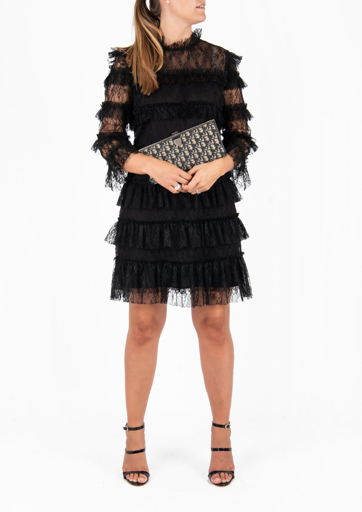

In [33]:
from PIL import Image
IMAGE_FOLDER_PATH = "../FREja_dataset_processing/Filtered_pictures/"
def load_image(row_index, pictures_df):
    image_path = IMAGE_FOLDER_PATH + pictures_df.iloc[row_index]["id"] + ".jpg"
    return Image.open(image_path)

#average_encodings_df.loc[row]
display_image = load_image(row, average_encodings_df)
display_image.thumbnail((512, 512))
display_image

In [37]:
row

5401

In [41]:
test_df = average_encodings_df.copy()
target_vector = test_df.loc[5401]["tag_vector"]
test_df["vector_distance"] = test_df["tag_vector"].apply(lambda x: torch.dist(x, target_vector).item())
#test_df["vector_distance"] = test_df["vector_distance"].apply(lambda x: 1 - x)
for evaluation_column in DISTANCE_EVALUATION_COLUMNS:
    target_embeddings = test_df.loc[row][evaluation_column]
    test_df[evaluation_column + "_distance0"] = test_df[evaluation_column].apply(lambda x: distance_evaluator(target_embeddings, x))
    test_df[evaluation_column + "_distance0"] = test_df[evaluation_column + "_distance0"].apply(lambda x: np.round(x, 4))

for resnet_column in DISTANCE_EVALUATION_COLUMNS:
    tag_correlation = test_df["vector_distance"].corr(test_df[resnet_column + "_distance0"]) ** 2
    model_correlations[resnet_column].append(tag_correlation)

test_df

,id,owner,resnet101,resnet34,resnet18,resnet152,resnet50,resnet18_distance0,resnet34_distance0,resnet50_distance0,resnet101_distance0,resnet152_distance0,tag_vector,vector_distance
0,picture.00058abb53434872ae9bb4270ae21f8e,outfit.98f32aaf08bc4ff09c44e6e11e9199bc,"[tensor(0.0395), tensor(0.), tensor(0.), tenso...","[tensor(3.6604), tensor(0.8882), tensor(0.), t...","[tensor(0.0422), tensor(0.6410), tensor(0.0234...","[tensor(0.), tensor(0.), tensor(0.0036), tenso...","[tensor(0.3866), tensor(0.), tensor(0.), tenso...",21.9159,23.2519,11.8503,14.4684,14.4164,"[[tensor(0.), tensor(0.), tensor(0.), tensor(0...",4.123106
1,picture.2911fa95ced4417d8cfced005367bf5b,outfit.98f32aaf08bc4ff09c44e6e11e9199bc,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[tensor(1.0447), tensor(0.1329), tensor(0.5254...","[tensor(0.1541), tensor(0.3240), tensor(0.0231...","[tensor(0.), tensor(0.3042), tensor(0.0083), t...","[tensor(0.2713), tensor(0.), tensor(0.0917), t...",23.2224,25.0845,12.1797,14.4979,15.5641,"[[tensor(0.), tensor(0.), tensor(0.), tensor(0...",4.123106
2,picture.3be163f353de4bceaffdebbd22429a80,outfit.98f32aaf08bc4ff09c44e6e11e9199bc,"[tensor(0.), tensor(0.), tensor(0.0093), tenso...","[tensor(1.8215), tensor(0.6718), tensor(0.3477...","[tensor(0.0110), tensor(0.4541), tensor(1.2275...","[tensor(0.), tensor(0.0636), tensor(0.0039), t...","[tensor(0.0999), tensor(0.), tensor(0.1091), t...",24.7497,23.6169,12.0026,13.7531,13.8375,"[[tensor(0.), tensor(0.), tensor(0.), tensor(0...",4.123106
3,picture.5ba8cf9fa702483ab6db2a5e39ea24ff,outfit.98f32aaf08bc4ff09c44e6e11e9199bc,"[tensor(0.), tensor(0.), tensor(0.0157), tenso...","[tensor(1.6987), tensor(0.1596), tensor(0.0502...","[tensor(0.1129), tensor(1.2328), tensor(0.0374...","[tensor(0.), tensor(0.), tensor(0.0214), tenso...","[tensor(0.2053), tensor(0.), tensor(0.), tenso...",22.5498,22.9361,12.7108,14.6458,14.0688,"[[tensor(0.), tensor(0.), tensor(0.), tensor(0...",4.123106
4,picture.d55b9888fe31446cafd45c64be9b6702,outfit.98f32aaf08bc4ff09c44e6e11e9199bc,"[tensor(0.1699), tensor(0.), tensor(0.), tenso...","[tensor(2.4043), tensor(0.3418), tensor(0.4830...","[tensor(0.2447), tensor(0.6232), tensor(0.2369...","[tensor(0.), tensor(0.0014), tensor(0.0201), t...","[tensor(0.1567), tensor(0.), tensor(0.0279), t...",21.6925,23.6678,11.6766,15.7732,14.7593,"[[tensor(0.), tensor(0.), tensor(0.), tensor(0...",4.123106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18055,picture.fd54d39a745844db8f640d2e6aca9317,outfit.d5f64f6d2edd4b98a7fb76d114a0ea3e,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[tensor(0.2913), tensor(0.1649), tensor(0.2103...","[tensor(0.0488), tensor(0.3660), tensor(0.0719...","[tensor(0.0155), tensor(0.0052), tensor(0.1140...","[tensor(0.), tensor(0.), tensor(0.), tensor(0....",23.6039,24.2921,12.9588,14.2235,14.6109,"[[tensor(0.), tensor(0.), tensor(0.), tensor(0...",4.123106
18056,picture.fe1b8b6ec0fc4c958cdd400ddd41b6eb,outfit.5bc9e4cca88c43728492c7bb18f52dc2,"[tensor(0.), tensor(0.0005), tensor(0.1520), t...","[tensor(4.3243), tensor(0.0051), tensor(1.1669...","[tensor(0.8752), tensor(0.3582), tensor(0.0488...","[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[tensor(0.1611), tensor(0.), tensor(0.9796), t...",24.7029,28.8962,13.1587,17.8352,14.6163,"[[tensor(0.), tensor(0.), tensor(0.), tensor(0...",3.872983
18057,picture.fe91d48a96c24600adfbbe27a1eb0946,outfit.ff9720b3fa3f42568a25aac897b66e6e,"[tensor(0.), tensor(0.), tensor(0.0346), tenso...","[tensor(0.7989), tensor(0.0247), tensor(0.4625...","[tensor(1.0632), tensor(1.8183), tensor(0.1442...","[tensor(0.0042), tensor(0.0397), tensor(0.), t...","[tensor(0.), tensor(0.0039), tensor(0.), tenso...",20.1926,19.0127,11.5287,14.2024,13.9223,"[[tensor(0.), tensor(0.), tensor(0.), tensor(0...",4.000000
18058,picture.fefac404b3b64e538a77ddc173ce305e,outfit.8ec82fae57674e6cbfed313cfeabad12,"[tensor(0.), tensor(0.), tensor(0.0410), tenso...","[tensor(0.6106), tensor(0.1509), tensor(0.1536...","[te

In [ ]:
test

In [46]:
test_df.groupby("owner").head(1).sort_values(by="resnet18_distance0", ascending=True)

,id,owner,resnet101,resnet34,resnet18,resnet152,resnet50,resnet18_distance0,resnet34_distance0,resnet50_distance0,resnet101_distance0,resnet152_distance0,tag_vector,vector_distance
13157,picture.51b6cd026e6547f8a362d7faebdfff30,outfit.fdc0c747a69749d1b9a53a7f17de8c74,"[tensor(0.0204), tensor(0.1769), tensor(0.), t...","[tensor(1.7094), tensor(0.3427), tensor(0.1314...","[tensor(1.6656), tensor(1.3175), tensor(0.1875...","[tensor(0.1840), tensor(0.), tensor(0.0369), t...","[tensor(0.), tensor(0.), tensor(0.), tensor(0....",11.9222,13.0101,7.5606,7.6396,7.8438,"[[tensor(0.), tensor(0.), tensor(0.), tensor(0...",1.732051
7797,picture.239683bf088c497b9cce7a8166e9a4c1,outfit.cb1e0ef5fb734388a9c8a7acd236d277,"[tensor(0.0206), tensor(0.1764), tensor(0.), t...","[tensor(1.7087), tensor(0.3408), tensor(0.1309...","[tensor(1.6655), tensor(1.3158), tensor(0.1860...","[tensor(0.1836), tensor(0.), tensor(0.0366), t...","[tensor(0.), tensor(0.), tensor(1.6535e-06), t...",11.9253,13.0227,7.5670,7.6458,7.8390,"[[tensor(0.), tensor(0.), tensor(0.), tensor(0...",2.236068
5399,picture.15e388c480f14e179e9bc71054449f0c,outfit.6deae1dce111481ab08d02422579b934,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[tensor(3.3706), tensor(0.5116), tensor(0.0119...","[tensor(0.8554), tensor(1.1652), tensor(0.1309...","[tensor(0.), tensor(0.), tensor(0.2413), tenso...","[tensor(0.), tensor(0.), tensor(0.0381), tenso...",12.0969,11.6628,6.0505,6.0957,7.1254,"[[tensor(0.), tensor(0.), tensor(0.), tensor(0...",0.000000
8915,picture.2ac8e84db6424138bde5d0be9b673ac8,outfit.06305912d79c45b3a8c5b19fe0338061,"[tensor(0.0085), tensor(0.), tensor(0.0443), t...","[tensor(0.5479), tensor(0.1063), tensor(0.4159...","[tensor(0.8183), tensor(1.2198), tensor(0.3535...","[tensor(0.0171), tensor(0.), tensor(0.3046), t...","[tensor(0.0197), tensor(0.), tensor(0.), tenso...",12.8606,15.3665,8.9886,9.2805,9.7870,"[[tensor(0.), tensor(0.), tensor(0.), tensor(0...",3.605551
9095,picture.2bba21fa8f594302a97ed4a289e4faf2,outfit.a81f6375502f40eeb181e201e5ba2785,"[tensor(0.0085), tensor(0.), tensor(0.0443), t...","[tensor(0.5479), tensor(0.1063), tensor(0.4159...","[tensor(0.8183), tensor(1.2198), tensor(0.3535...","[tensor(0.0171), tensor(0.), tensor(0.3046), t...","[tensor(0.0197), tensor(0.), tensor(0.), tenso...",12.8606,15.3665,8.9886,9.2805,9.7870,"[[tensor(0.), tensor(0.), tensor(0.), tensor(0...",3.605551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7264,picture.20465116d7154698aece86f2e3e0317e,outfit.c6c1b4c26d4d4d2ebd7d8ed8d6460c23,"[tensor(0.), tensor(0.), tensor(0.0439), tenso...","[tensor(1.2626), tensor(0.0301), tensor(0.1804...","[tensor(2.4157), tensor(1.1946), tensor(0.5085...","[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[tensor(0.), tensor(0.), tensor(0.5519), tenso...",34.7438,32.2647,13.0727,16.5948,15.4648,"[[tensor(0.), tensor(0.), tensor(0.), tensor(0...",3.605551
15240,picture.73cf4e1fc831414e875f803e8b652237,outfit.33989de3668d43a5955c6109f3cbf9c0,"[tensor(0.), tensor(0.), tensor(0.0439), tenso...","[tensor(1.2626), tensor(0.0301), tensor(0.1804...","[tensor(2.4157), tensor(1.1946), tensor(0.5085...","[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[tensor(0.), tensor(0.), tensor(0.5519), tenso...",34.7438,32.2647,13.0727,16.5948,15.4648,"[[tensor(0.), tensor(0.), tensor(0.), tensor(0...",3.605551
17140,picture.a62ab1e8105e433d8f8c0fdd3e830aae,outfit.12edb7c33c6641db99f0b20fc0dccb35,"[tensor(0.), tensor(0.), tensor(0.0439), tenso...","[tensor(1.2626), tensor(0.0301), tensor(0.1804...","[tensor(2.4157), tensor(1.1946), tensor(0.5085...","[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[tensor(0.), tensor(0.), tensor(0.5519), tenso...",34.7438,32.2647,13.0727,16.5948,15.4648,"[[tensor(0.), tensor(0.), tensor(0.), tensor(0...",3.605551
12218,picture.46bb74c069a5493ca30ffd4bc0148cc2,outfit.f6fe522d79ff4fb5b99a25cff7a448cf,"[tensor(0.), tensor(0.), tensor(0.0712), tenso...","[tensor(0.3429), tensor(0.3655), tensor(0.7064...","[te